In [1]:
import functools
import glob
import pandas as pd
import numpy as np

# Data

Datos del Comunicado Técnico Diario oficial de la Secretaría de Salud.

In [81]:
data = pd.read_csv('data/indre_covid_mex_290320.csv')

In [82]:
# Subset
dat = data[['Case_ID','Date_Confirmed','Region','Age','Sex','Origin']]

In [83]:
# Region delta
count_df = (dat.groupby(['Region','Date_Confirmed'])['Date_Confirmed'].count()).to_frame()

In [84]:
# Rename
count_df['Region_Delta'] = count_df['Date_Confirmed']

In [85]:
# Region cumulative by date
count_df['Region_Cumulative'] = count_df.groupby(['Region'])['Region_Delta'].cumsum()

In [87]:
# Clean up
count_df = count_df.drop(['Date_Confirmed'], axis=1)

In [88]:
# Mexico cumulative by date
count_df['Mexico_Cumulative'] = count_df.groupby(['Date_Confirmed'])['Region_Cumulative'].cumsum()

In [89]:
count_df

Region_Delta  Region_Cumulative  \
Region         Date_Confirmed                                    
AGUASCALIENTES 3/16/2020                  1                  1   
               3/19/2020                  3                  4   
               3/23/2020                  2                  6   
               3/25/2020                  6                 12   
               3/26/2020                  1                 13   
...                                     ...                ...   
ZACATECAS      3/21/2020                  1                  1   
               3/22/2020                  1                  2   
               3/23/2020                  1                  3   
               3/26/2020                  1                  4   
               3/29/2020                  1                  5   

                               Mexico_Cumulative  
Region         Date_Confirmed                     
AGUASCALIENTES 3/16/2020                       1  
               3/19/2020                       4  
               3/23/2020                       6  
               3/25/2020                      12  
               3/26/2020                      13  
...                                          ...  
ZACATECAS      3/21/2020                     211  
               3/22/2020                     240  
               3/23/2020                     277  
               3/26/2020                     535  
               3/29/2020                     911  

[258 rows x 3 columns]

In [90]:
#from IPython.core.display import HTML
#display(HTML(count_df.to_html()))

In [12]:
from matplotlib import pyplot as plt

In [28]:
pivot_tbl = count_df.reset_index().pivot('Region','Date_Confirmed','Region_Cumulative').T # pivot and transpose 

In [43]:
pivot_tbl.columns

Index(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA\nSUR',
       'BAJA CALIFORNIA SUR', 'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA',
       'CIUDAD DE MÉXICO', 'COAHUILA', 'COLIMA', 'DURANGO', 'GUANAJUATO',
       'GUERRERO', 'HIDALGO', 'JALISCO', 'MICHOACÁN', 'MORELOS', 'MÉXICO',
       'NAYARIT', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERETARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype='object', name='Region')

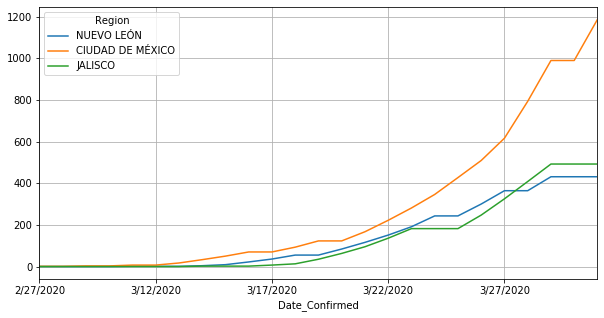

In [45]:
pivot_tbl.fillna(0).cumsum()[['NUEVO LEÓN', 'CIUDAD DE MÉXICO', 'JALISCO']].plot(figsize=(10,5), grid=True)

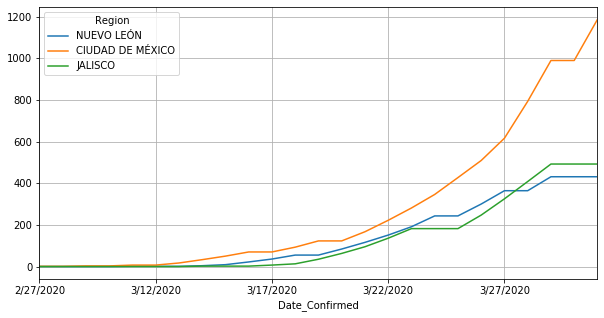

In [55]:
pivot_tbl.fillna(0).cumsum()[['NUEVO LEÓN', 'CIUDAD DE MÉXICO', 'JALISCO']].plot(figsize=(10,5), grid=True)

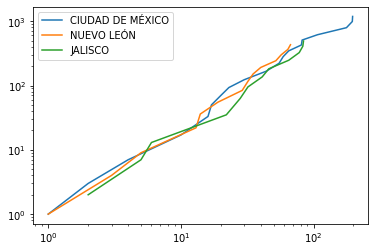

In [71]:
from numpy import *
import math
import matplotlib.pyplot as plt

state_lane = {}

for state in ['CIUDAD DE MÉXICO', 'NUEVO LEÓN', 'JALISCO']:
    plt.plot(list(pivot_tbl[state].dropna()), list(pivot_tbl[state].dropna().cumsum()), label = state) # plotting t, c separately 

plt.legend()
plt.yscale('log')
plt.xscale('log')

plt.show()



In [29]:
pivot_tbl['NUEVO LEÓN']

Region,AGUASCALIENTES,BAJA CALIFORNIA,BAJA CALIFORNIA\nSUR,BAJA CALIFORNIA SUR,CAMPECHE,CHIAPAS,CHIHUAHUA,CIUDAD DE MÉXICO,COAHUILA,COLIMA,...,QUINTANA ROO,SAN LUIS POTOSÍ,SINALOA,SONORA,TABASCO,TAMAULIPAS,TLAXCALA,VERACRUZ,YUCATÁN,ZACATECAS
Date_Confirmed,,,,,,,,,,,,,,,,,,,,,
2/27/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/28/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/29/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/1/2020,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/11/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/12/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/13/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3/14/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3/15/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,NaN,NaN,...,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
